In [ ]:
# convolution neural network with bag of words (BOW)

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
train=pd.read_csv("NTCIR-13_MedWeb_en_training.csv")
test=pd.read_csv("NTCIR-13_MedWeb_en_test.csv")

In [ ]:
from vectorizers import SpacyLemmatizer
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
docu_train=list(train.Tweet)
docu_test=list(test.Tweet)

In [ ]:
# runnynose
outcomes_train_runose=train.Runnynose
outcomes_test_runose=test.Runnynose
y_train_runose = outcomes_train_runose.replace({'n':0, 'p':+1})
y_test_runose = outcomes_test_runose.replace({'n':0, 'p':+1})

In [ ]:
lemmatizer = SpacyLemmatizer(nlp, join_str=' ', n_threads=1)
lemmas_train = lemmatizer(docu_train) # generator object is returned
tweet_train = list(lemmas_train)
lemmas_test = lemmatizer(docu_test)
tweet_test = list(lemmas_test)

In [ ]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.extend('haha ugghh ugh uh um oh ok okay boo damn god yu yike yen yay mikos mitsuru shirasu lol sigh 10 100 10000 1004 102 104 320000 968' .split())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=set(stop))
X_train = vectorizer.fit_transform(tweet_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer.vocabulary_)
X_test = vectorizer_test.fit_transform(tweet_test)

train_doc_term_train = X_train.toarray()
print('Shape of X_train:')
print(X_train.shape)
print('Shape of X_test:')
print(X_test.shape)

In [ ]:
X_train=X_train.toarray()
X_train.shape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

In [ ]:
X_test=X_test.toarray()
X_test.shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
print('Build model...')
model = Sequential()
epochs = 15
batch_size = 10

In [ ]:
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1269,1)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train, y_train_runose,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test_runose))

In [ ]:
### Start ###

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Testing accuracy')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and testing loss')
    plt.legend()

In [2]:
# LSTM using padding sequence

In [3]:
import pandas as pd

In [4]:
train=pd.read_csv("NTCIR-13_MedWeb_en_training.csv")
test=pd.read_csv("NTCIR-13_MedWeb_en_test.csv")

from vectorizers import SpacyLemmatizer
import en_core_web_sm
nlp = en_core_web_sm.load()

docu_train=list(train.Tweet)
docu_test=list(test.Tweet)

lemmatizer = SpacyLemmatizer(nlp, join_str=' ', n_threads=1)
lemmas_train = lemmatizer(docu_train) # generator object is returned

tweet_train = list(lemmas_train)
lemmas_test = lemmatizer(docu_test)
tweet_test = list(lemmas_test)

In [5]:
list_classes = ["Influenza", "Diarrhea","Hayfever","Cough","Headache","Fever","Runnynose","Cold"]
result_train = train[list_classes].replace({'n':0, 'p':+1})
y_train = result_train.values
result_test = test[list_classes].replace({'n':0, 'p':+1})
y_test = result_test.values

In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2500)
tokenizer.fit_on_texts(tweet_train)

Using TensorFlow backend.


In [7]:
X_train = tokenizer.texts_to_sequences(tweet_train)
X_test = tokenizer.texts_to_sequences(tweet_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(tweet_train[2])
print(X_train[2])

i be so feverish and out of it because of my allergy  i be so sleepy 
[1, 2, 12, 261, 9, 53, 15, 8, 32, 15, 5, 19, 1, 2, 12, 236]


In [8]:
vocab_size

1408

In [9]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [10]:
print(X_train[2, :])

[  1   2  12 261   9  53  15   8  32  15   5  19   1   2  12 236   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
print('Build LSTM Model >>>>')
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

max_features = vocab_size
batch_size = 128

model = Sequential()
model.add(Embedding(max_features, 100))
model.add(LSTM(256, dropout=0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

print('Train...')
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Build CNN1D Model >>>>
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 100, 100)          140800    
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 96, 128)           64128     
_________________________________________________________________
dropout_24 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
global_max_pooling1d_24 (Glo (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 25)                3225      
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 208       
Total params: 208,361
Trainable params: 208,361
Non-trainable params: 0
________________________

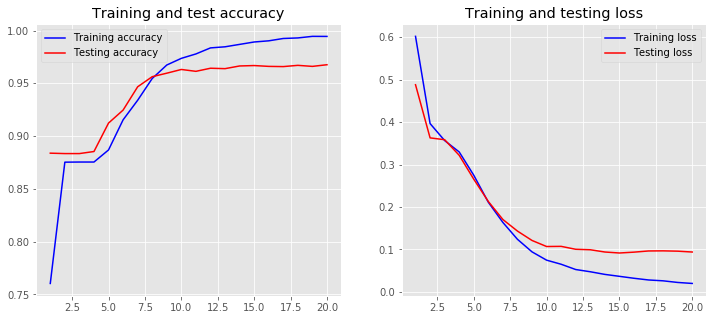

In [20]:
print('Build CNN1D Model >>>>')

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(8, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

print('Training...')
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [51]:
pred_test = model.predict(X_test)
classes = pred_train > 0.5
pred_test = classes.astype(int) # update predicted value

pred_test

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [84]:
print("Check the error classification in test data >>>\n")

for row in range (1, 640):
    for col in range (1, 8):
        if col==1:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Influenza Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==2:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Diarrhea Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==3:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Hayfever Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==4:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Cough Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==5:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Headache Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==6:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Fever Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        elif col==7:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Runnynose Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
        else:
            if (pred_test[row-1,col-1]==y_test[row-1,col-1])==False:
                print(docu_train[row-1])
                print("Error Cold Detectiion")
                print("Real symptoms:%d   Predicted symptom:%d\n\n"%(y_test[row-1,col-1],pred_test[row-1,col-1]))
                
                
        
        
    

Check the error classification in test data >>>

It's been a while since I've had allergy symptoms.
Error Headache Detectiion
Real symptoms:0   Predicted symptom:1


I took some medicine for my runny nose, but it won't stop.
Error Influenza Detectiion
Real symptoms:1   Predicted symptom:0


I took some medicine for my runny nose, but it won't stop.
Error Fever Detectiion
Real symptoms:1   Predicted symptom:0


I have a fever but I don't think it's the kind of cold that will make it to my stomach.
Error Influenza Detectiion
Real symptoms:0   Predicted symptom:1


I have a fever but I don't think it's the kind of cold that will make it to my stomach.
Error Fever Detectiion
Real symptoms:0   Predicted symptom:1


I thought it was just allergies, but now I have a fever. It looks like I have a cold.
Error Runnynose Detectiion
Real symptoms:1   Predicted symptom:0


My headache got better after taking a bath.
Error Runnynose Detectiion
Real symptoms:0   Predicted symptom:1


Now that I think

In [15]:
print('Grid Search Hyperparameters For CNN...')

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(batch_size, 
                 epochs, 
                 num_filters, 
                 kernel_size, 
                 vocab_size, 
                 embedding_dim, 
                 maxlen, 
                 learning_rate=0.001, 
                 dropout_rate=0.0, 
                 neurons=10):
# create model
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(8, activation='sigmoid'))
# Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

# Grid search on hyperparameters
vocab_size=1408
maxlen=100
embedding_dim=100

param_grid = dict(batch_size=[10, 20, 50, 100], 
                  epochs=[10, 20, 30], 
                  num_filters=[32, 64, 128], 
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen], 
                  learning_rate=[0.001, 0.01, 0.1, 0.2], 
                  dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 
                  neurons = [10, 15, 20, 25, 30])

# create model
model = KerasClassifier(build_fn=create_model, verbose=False)

Grid Search Hyperparameters For CNN...


In [16]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished


In [17]:
# summarize results
print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy: 0.961719 using {'vocab_size': 1408, 'num_filters': 64, 'neurons': 30, 'maxlen': 100, 'learning_rate': 0.001, 'kernel_size': 3, 'epochs': 20, 'embedding_dim': 100, 'dropout_rate': 0.4, 'batch_size': 50}


In [23]:
import numpy as np
result_train=np.array(y_train[:1])
result_test=np.array(y_test[:1])

In [24]:
result_test

array([[1, 0, 0, 0, 0, 1, 0, 0]])